# AlphaFold Protein Structure Database

Differences in the complexity of protein structures for different categories of proteins, using the
structure predictions from the AlphaFold Protein Structure Database


In [27]:
# Library imports 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import PDBList, PDBParser
import py3Dmol 

## Data Acquisition: Retreiving Protein Structures Using BioPython
BioPython allows you to fetch and parse structures from PDB. we will need to retreive structures for both enzymes and transcription factors.

## Visualizing 3D Protein Structure

In [28]:
import requests
import py3Dmol

# UniProt ID for hexokinase
uniprot_id = "P52789"

# AlphaFold API URL to get the prediction model
url = f"https://alphafold.ebi.ac.uk/api/prediction/{uniprot_id}"

# Send GET request to the AlphaFold API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse JSON data
    # Extract the PDB URL from the response
    pdb_url = data[0]['pdbUrl']
    print(f"AlphaFold predicted model PDB URL: {pdb_url}")

    # Download the PDB file content
    pdb_response = requests.get(pdb_url)
    pdb_data = pdb_response.text  # Get the PDB data as text

    # Save the PDB data to a file
    pdb_filename = 'hexokinase.pdb'
    with open(pdb_filename, 'w') as pdb_file:
        pdb_file.write(pdb_data)
    print(f"PDB file saved as {pdb_filename}")

    # Create a py3Dmol viewer object
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_data, "pdb")  # Add the PDB data to the viewer
    viewer.setStyle({'cartoon': {'color': 'spectrum'}})  # Set the visualization style
    viewer.zoomTo()  # Adjust zoom to fit the structure
    viewer.show()  # Display the 3D structure
else:
    print(f"Failed to retrieve data from AlphaFold API. Status code: {response.status_code}")


AlphaFold predicted model PDB URL: https://alphafold.ebi.ac.uk/files/AF-P52789-F1-model_v4.pdb
PDB file saved as hexokinase.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
import numpy as np
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 1: Parse the PDB file and extract atom coordinates
def extract_coordinates(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)

    atom_coordinates = []
    for atom in structure.get_atoms():
        atom_coordinates.append(atom.get_coord())

    return np.array(atom_coordinates)

# Step 2: Calculate the bounding box for the protein structure
def calculate_bounding_box(coords):
    min_coords = coords.min(axis=0)
    max_coords = coords.max(axis=0)
    return min_coords, max_coords

# Step 3: Box counting function
def box_counting(coords, min_coords, max_coords, grid_size):
    n_boxes = np.ceil((max_coords - min_coords) / grid_size).astype(int)
    occupied_boxes = set()

    # Assign atoms to grid cells (boxes)
    for coord in coords:
        box_idx = tuple(((coord - min_coords) // grid_size).astype(int))
        occupied_boxes.add(box_idx)

    return len(occupied_boxes)

# Step 4: Perform box counting over different grid sizes
def perform_box_counting(coords, min_coords, max_coords):
    # Calculate the largest bounding box dimension (max_length)
    max_length = np.max(max_coords - min_coords)  # Get the largest bounding box dimension

    # Generate grid sizes from max_length/100 to max_length/2, with 15 grid sizes
    grid_sizes = np.logspace(np.log10(max_length/100), np.log10(max_length/2), num=15)

    occupied_boxes_per_grid = []
    for grid_size in grid_sizes:
        occupied_boxes = box_counting(coords, min_coords, max_coords, grid_size)
        occupied_boxes_per_grid.append(occupied_boxes)
    
    return grid_sizes, occupied_boxes_per_grid

# Step 5: Calculate and plot fractal dimension
def calculate_fractal_dimension(grid_sizes, occupied_boxes_per_grid):
    log_occupied_boxes = np.log(occupied_boxes_per_grid)
    log_inverse_grid_size = np.log(1 / grid_sizes)

    # Plot the results
    plt.plot(log_inverse_grid_size, log_occupied_boxes, 'o-', label='Data')
    plt.xlabel('log(1 / grid size)')
    plt.ylabel('log(Number of occupied boxes)')
    plt.title('Box Counting Fractal Dimension')
    plt.legend()
    plt.show()

    # Perform linear regression on log-log data to find the slope (fractal dimension)
    slope, intercept, r_value, p_value, std_err = linregress(log_inverse_grid_size, log_occupied_boxes)
    fractal_dimension = slope
    print(f"Estimated Fractal Dimension: {fractal_dimension:.4f}")
    return fractal_dimension

# Step 6: Main function to estimate the fractal dimension of a protein structure
def estimate_fractal_dimension(pdb_file):
    # Extract coordinates
    coords = extract_coordinates(pdb_file)

    # Calculate bounding box
    min_coords, max_coords = calculate_bounding_box(coords)

    # Perform box counting
    grid_sizes, occupied_boxes_per_grid = perform_box_counting(coords, min_coords, max_coords)

    # Calculate and plot fractal dimension
    fractal_dimension = calculate_fractal_dimension(grid_sizes, occupied_boxes_per_grid)

    return fractal_dimension




## Fractal Dimension 

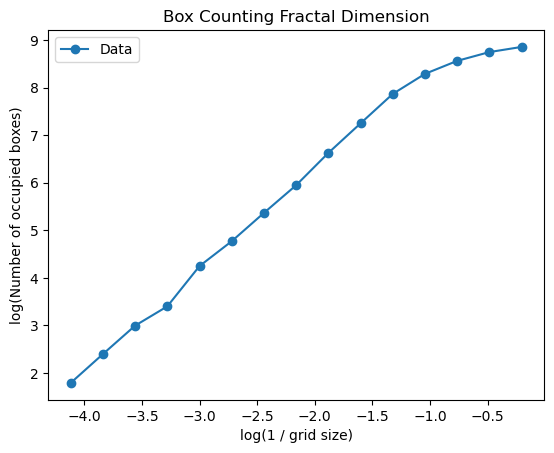

Estimated Fractal Dimension: 1.9426
Fractal Dimension of the protein in hexokinase.pdb: 1.9426


In [32]:
# usage: Replace 'hexokinase.pdb' 
pdb_file = 'hexokinase.pdb'  # You can replace this with your actual PDB file
fractal_dimension = estimate_fractal_dimension(pdb_file)
print(f"Fractal Dimension of the protein in {pdb_file}: {fractal_dimension:.4f}")

## Visualizing 3D Transcription Factor 

In [33]:
# UniProt ID for p53
uniprot_id = "P04637"

# AlphaFold API URL to get the prediction model
url = f"https://alphafold.ebi.ac.uk/api/prediction/{uniprot_id}"

# Send GET request to the AlphaFold API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse JSON data
    # Extract the PDB URL from the response
    pdb_url = data[0]['pdbUrl']
    print(f"AlphaFold predicted model PDB URL: {pdb_url}")

    # Download the PDB file content
    pdb_response = requests.get(pdb_url)
    pdb_data = pdb_response.text  # Get the PDB data as text


    # Save the PDB data to a file
    pdb_filename = 'p53_AFP.pdb'
    with open(pdb_filename, 'w') as pdb_file:
        pdb_file.write(pdb_data)
    print(f"PDB file saved as {pdb_filename}")

    # Create a py3Dmol viewer object
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_data, "pdb")  # Add the PDB data to the viewer
    viewer.setStyle({'cartoon': {'color': 'spectrum'}})  # Set the visualization style
    viewer.zoomTo()  # Adjust zoom to fit the structure
    viewer.show()  # Display the 3D structure
else:
    print(f"Failed to retrieve data from AlphaFold API. Status code: {response.status_code}")


AlphaFold predicted model PDB URL: https://alphafold.ebi.ac.uk/files/AF-P04637-F1-model_v4.pdb
PDB file saved as p53_AFP.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

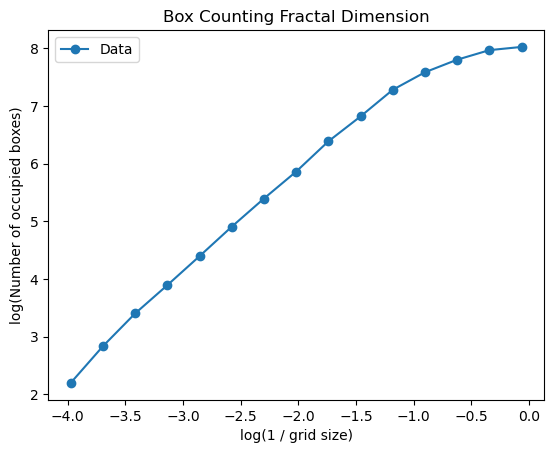

Estimated Fractal Dimension: 1.5569
Fractal Dimension of the protein in p53.pdb: 1.5569


In [34]:
# usage: Using p53 TF
pdb_file = 'p53.pdb'  
fractal_dimension = estimate_fractal_dimension(pdb_file)
print(f"Fractal Dimension of the protein in {pdb_file}: {fractal_dimension:.4f}")